# Logistic Regression

In [556]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [557]:
# Load data
data = pd.read_csv('../data/titanic/train.csv')
data['Cabin'] = data['Cabin'].fillna('')
data['Age'] = data['Age'].fillna(0.0)
data['Fare'] = data['Fare'].fillna(0.0)

### Create 'HadRelevant': Reduce sibsp/parch by adding them together and checking if >0. If so, it means it had a relevant (sibling, spouse, parent, children) aboard the Titanic

In [558]:
# Create the combined variable based on the condition

data['Hadrelevant'] = ((data['SibSp'].astype(int) + data['Parch'].astype(int)) > 0).astype(int)


### Cast age/fare to int to make it easier on the compute resources

In [559]:
data['Age']  = data['Age'].astype(int)
data['Fare'] = data['Fare'].astype(int)

### Create 1-hot encoding for Sex and embarked

In [560]:
# One-hot encode the 'Sex' column
data = pd.get_dummies(data, columns=['Sex'], prefix='', prefix_sep='')
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked', prefix_sep='_')
data = data.astype({'male': 'int', 'female': 'int', 'Embarked_C': 'int', 'Embarked_Q': 'int', 'Embarked_S': 'int'})
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris   22      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1      0   
2                               Heikkinen, Miss. Laina   26      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   35      1      0   
4                             Allen, Mr. William Henry   35      0      0   
..                                                 ...  ...    ...    ...   
886 

### One-hot Cabin letter and keep number only

In [561]:
# Step 1: Extract cabin letter and number
data['Cabin_Letter'] = data['Cabin'].str.extract(r'([A-Za-z])', expand=False)
data['Cabin_Number'] = data['Cabin'].str.extract(r'(\d+)', expand=False).astype(float)
data['Cabin_Number'] = data['Cabin_Number'].fillna(0)
data['Cabin_Number'] = data['Cabin_Number'].astype(int)
data = pd.get_dummies(data, columns=['Cabin_Letter'], prefix='Cabin', prefix_sep='_', drop_first=True)
data = data.astype({'Cabin_B': 'int', 'Cabin_C': 'int', 'Cabin_D': 'int', 'Cabin_E': 'int', 'Cabin_F': 'int', 'Cabin_G': 'int', 'Cabin_T': 'int'})

### Drop non-relevant columns

In [562]:
columns_to_drop = [
    # Reduced to 'Hadrelevant'
    'SibSp',
    'Parch',
    # Name isnt useful, nor is ID or ticket
    'Name',
    'PassengerId',
    'Ticket',
    # Cabin was process
    'Cabin',
]

for field in columns_to_drop:
    data = data.drop(columns=field, axis=1)

print(data)

     Survived  Pclass  Age  Fare  Hadrelevant  female  male  Embarked_C  \
0           0       3   22     7            1       0     1           0   
1           1       1   38    71            1       1     0           1   
2           1       3   26     7            0       1     0           0   
3           1       1   35    53            1       1     0           0   
4           0       3   35     8            0       0     1           0   
..        ...     ...  ...   ...          ...     ...   ...         ...   
886         0       2   27    13            0       0     1           0   
887         1       1   19    30            0       1     0           0   
888         0       3    0    23            1       1     0           0   
889         1       1   26    30            0       0     1           1   
890         0       3   32     7            0       0     1           0   

     Embarked_Q  Embarked_S  Cabin_Number  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
0             0   

### Scale values

In [563]:
standard = StandardScaler()
minmax = MinMaxScaler()

columns_to_scale = [
    'Fare',
    'Pclass',
    'Age'
]


for field in columns_to_scale:
    data[field] = pd.DataFrame(minmax.fit_transform((data[field].to_numpy()).reshape(-1,1)))

print(data)


     Survived  Pclass     Age      Fare  Hadrelevant  female  male  \
0           0     1.0  0.2750  0.013672            1       0     1   
1           1     0.0  0.4750  0.138672            1       1     0   
2           1     1.0  0.3250  0.013672            0       1     0   
3           1     0.0  0.4375  0.103516            1       1     0   
4           0     1.0  0.4375  0.015625            0       0     1   
..        ...     ...     ...       ...          ...     ...   ...   
886         0     0.5  0.3375  0.025391            0       0     1   
887         1     0.0  0.2375  0.058594            0       1     0   
888         0     1.0  0.0000  0.044922            1       1     0   
889         1     0.0  0.3250  0.058594            0       0     1   
890         0     1.0  0.4000  0.013672            0       0     1   

     Embarked_C  Embarked_Q  Embarked_S  Cabin_Number  Cabin_B  Cabin_C  \
0             0           0           1             0        0        0   
1        

### Create X, y arrays after feature processing

In [564]:
X = np.array(data.drop('Survived', axis=1))
y = np.array(data['Survived'])

## After Feature Engineering
No scale needed

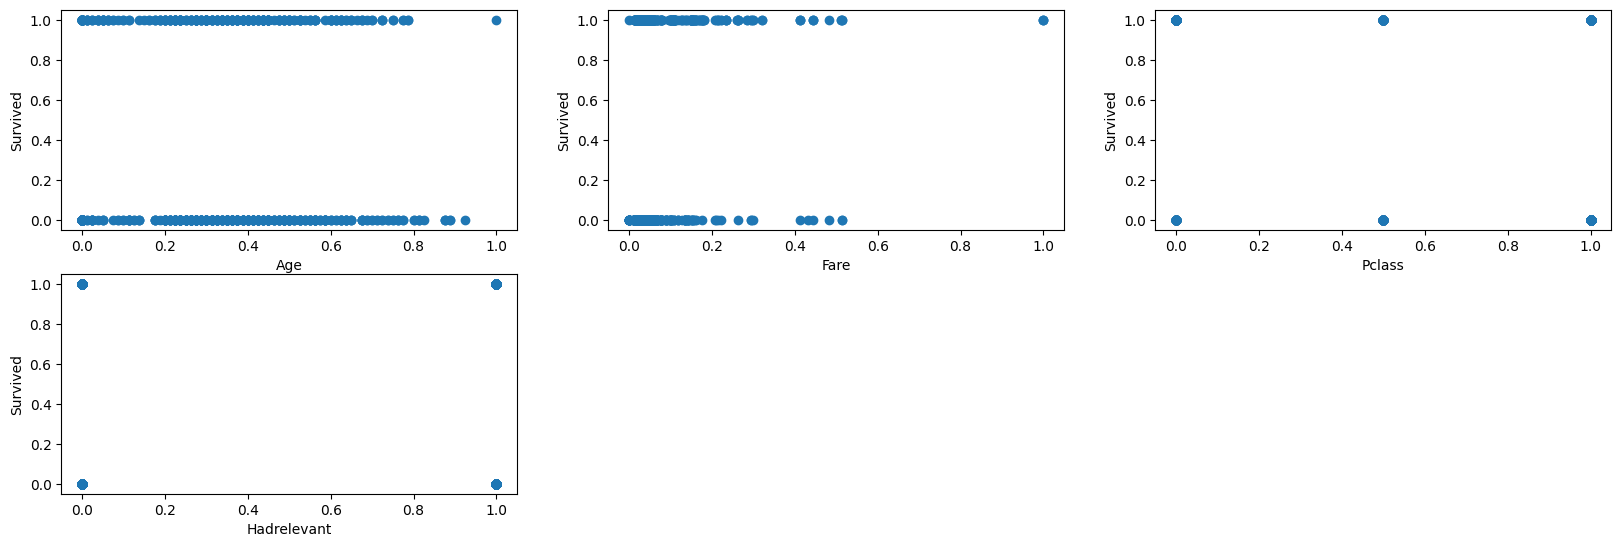

In [565]:
fields_to_plot = [
    'Age',
    'Fare',
    'Pclass',
    'Hadrelevant'

]

plt.figure(figsize=(20,20))

for i in range(1,len(fields_to_plot)+1):
    field = fields_to_plot[i-1]
    plt.subplot(6, 3, i)
    plt.scatter(np.array(data[field]), y)
    plt.xlabel(field)
    plt.ylabel('Survived')


### Split dataset

In [566]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 17)
(712,)
(179, 17)
(179,)


# Algorithm
$
h_\theta = \frac{1}{1+e^{-(\theta_0+\theta_1X)}}
$

# Model

In [567]:
class LogisticReg:
    # Hyperparametrers
    def __init__(self, lr = 0.01, epochs = 100, treshold = .5, regularization = None, alpha = 0):
        self.lr = lr
        self.epochs = epochs
        self.treshold = treshold
        self.regularization = regularization
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        # Matrix dimentions
        # m = rows
        # n = columns
        m, n = X.shape

        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        # We need to reshape y to be a column vector
        y = y.reshape(m, 1)

        losses = list()
        b_list = list()
        w_list = list()

        # Gradient Descent
        for epoch in range(self.epochs):
            # Calculate Prediction
            y_hat = self.sigmoid(X)

            # Get loss - L - J
            loss = self.bce(y, y_hat)          # Mean Square Error
            losses.append(loss)

            # Calculate gradient
            dw = (-1 / m) * np.dot(X.T, (y - y_hat))
            db = (-1 / m) * np.sum((y - y_hat))
            
            # upgrade parames
            self.weights = self.weights - self.lr * dw + self.regularizate()
            self.bias = self.bias - self.lr * db + self.regularizate()

            w_list.append(self.weights)
            b_list.append(self.bias)

            print(f"epoch: {epoch}, loss: {loss}, w: {self.weights}, b: {self.bias}")

        return self.weights, self.bias, losses, w_list, b_list
    
    def linear(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def sigmoid(self, X):
        return 1 / ( 1 + np.exp(-(self.linear(X))) )

    def predict(self, X):
        return (self.sigmoid(X) >= self.treshold).astype(int)
    
    def mse(self, y, y_hat):
        return np.mean((y - y_hat)**2)

    def bce(self, y, y_hat):
        # return - np.mean(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))
        return - np.mean(np.dot(y.T,np.log(y_hat+1e-9)) + (1-y).T.dot(np.log(1-y_hat+1e-9)))
    
    def regularizate(self):
        if (self.regularization == None):
            return 0
        elif (self.regularization == "L1"):
            return self.alpha * np.sum(np.abs(self.weights))
        elif (self.regularization == "L2"):
            return self.alpha * np.sum(self.weights**2)
        else:
            return 0

In [568]:
np.random.seed(42)
model = LogisticReg(lr=0.01,epochs=10000, regularization="L1", alpha=0.00001)
w, b, losses, w_list, b_list = model.fit(X_train, y_train)

epoch: 0, loss: 1883.1898405720751, w: [[0.37059461]
 [0.94921586]
 [0.73183765]
 [0.59693141]
 [0.15546684]
 [0.15141855]
 [0.05757247]
 [0.86580245]
 [0.59695114]
 [0.66812865]
 [0.02052353]
 [0.96969424]
 [0.8324531 ]
 [0.21233391]
 [0.18183484]
 [0.18345552]
 [0.3043087 ]], b: [0.51954902]
epoch: 1, loss: 1868.3137561703363, w: [[0.36665939]
 [0.94772012]
 [0.73168124]
 [0.5952075 ]
 [0.1549176 ]
 [0.14685205]
 [0.05706292]
 [0.8654291 ]
 [0.59279679]
 [0.62818499]
 [0.02046206]
 [0.96947807]
 [0.832463  ]
 [0.21232814]
 [0.18184426]
 [0.18350597]
 [0.30437459]], b: [0.51435423]
epoch: 2, loss: 1851.9508769005013, w: [[0.36273457]
 [0.94622716]
 [0.73152472]
 [0.59348681]
 [0.15437097]
 [0.14229516]
 [0.05655499]
 [0.86505612]
 [0.58865208]
 [0.58824175]
 [0.02040011]
 [0.96926136]
 [0.83247234]
 [0.2123218 ]
 [0.18185323]
 [0.18355586]
 [0.30443994]], b: [0.50917221]
epoch: 3, loss: 1833.7228515826055, w: [[0.35882028]
 [0.944737  ]
 [0.7313681 ]
 [0.59176943]
 [0.153827  ]
 [0.13

# Results

Text(0, 0.5, 'loss')

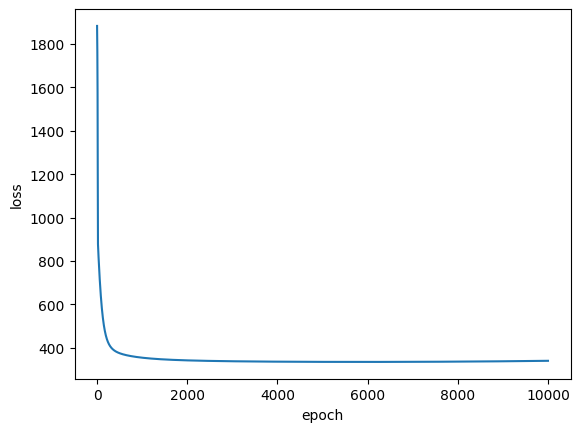

In [569]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel('epoch')
plt.ylabel('loss')


In [570]:
y_predicted = model.predict(X_test)

In [571]:
print(f"Loss: {losses[-1]}, weight: {w}, bias: {b}")

Loss: 339.43183220914716, weight: [[-0.89704561]
 [ 0.92554254]
 [ 1.90295294]
 [ 0.14301041]
 [ 1.51668662]
 [-1.15080636]
 [ 1.2564437 ]
 [ 1.34832148]
 [ 0.3004183 ]
 [-0.01684647]
 [ 1.58125607]
 [ 1.53375194]
 [ 2.17064327]
 [ 2.0075012 ]
 [ 1.75355699]
 [ 1.37343656]
 [ 1.60485298]], bias: [-0.78571348]
